In [3]:
# HIDDEN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from matplotlib import patches
from datascience import *
%matplotlib inline
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [4]:
!curl -LJO  https://github.com/data-88e/textbook/raw/master/content/01-demand/avocados.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4407  100  4407    0     0  31035      0 --:--:-- --:--:-- --:--:-- 31035


In [5]:
avocados = Table.read_table("avocados.csv") 
avocados

Date,Average Price,Total Volume
2015-12-27,1.05,692206
2015-12-20,1.15,637091
2015-12-13,1.22,616016
2015-12-06,1.06,694982
2015-11-29,1.05,651639
2015-11-22,1.04,709444
2015-11-15,0.99,775849
2015-11-08,1.4,599884
2015-11-01,0.97,869927
2015-10-25,1.55,561342


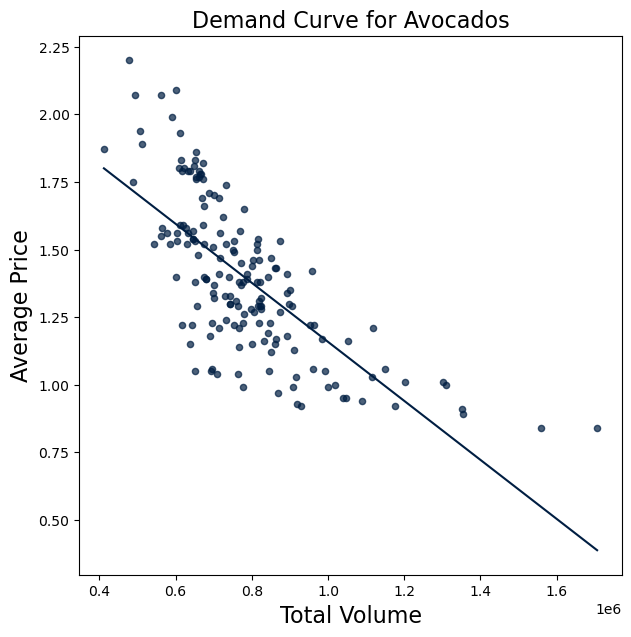

In [6]:
avocados.scatter("Total Volume", "Average Price", fit_line = True, width = 7, height = 7)
plt.title("Demand Curve for Avocados", fontsize = 16);

In [7]:
slope, intercept = np.polyfit(avocados.column("Average Price"), avocados.column("Total Volume"), 1)
print("The slope is:", slope)
print("The intercept is:", intercept)

The slope is: -476412.718982
The intercept is: 1446951.64081


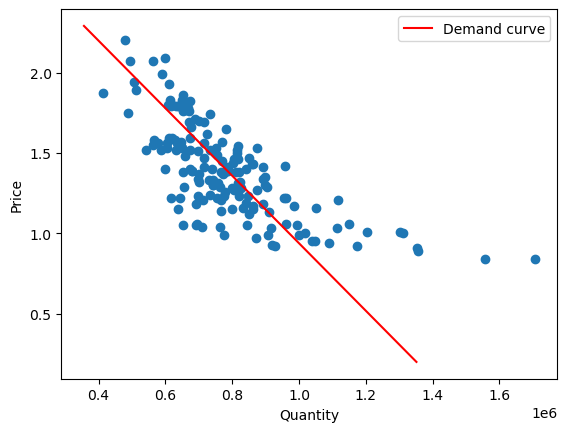

In [8]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
prices = np.arange(0.2, 2.3, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

In [9]:
log_quantity = np.log(avocados.column("Total Volume"))

slope, intercept = np.polyfit(avocados.column("Average Price"), log_quantity, 1)
print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.579267037452
The intercept is:  14.3525068617


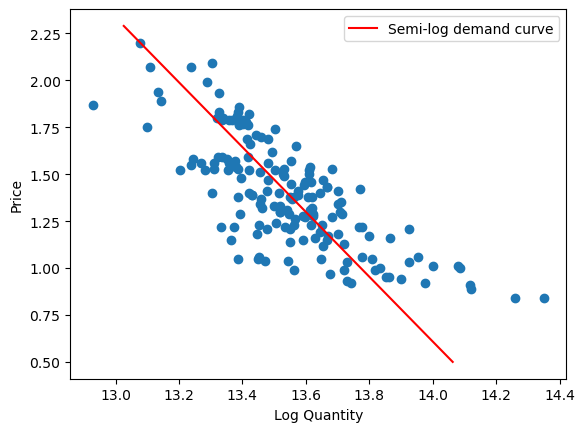

In [10]:
plt.scatter(log_quantity, avocados.column("Average Price"))
prices = np.arange(0.5, 2.3, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Semi-log demand curve")
plt.xlabel("Log Quantity")
plt.ylabel("Price")
plt.legend();

In [11]:
log_quantity = np.log(avocados.column("Total Volume"))
log_price = np.log(avocados.column("Average Price"))

slope, intercept = np.polyfit(log_price, log_quantity, 1)
print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.815728589476
The intercept is:  13.7984609055


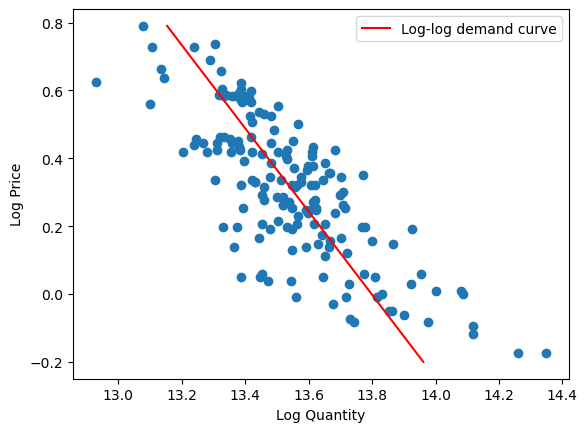

In [12]:
plt.scatter(log_quantity, log_price)
prices = np.arange(-0.2, 0.8, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Log-log demand curve")

plt.xlabel("Log Quantity")
plt.ylabel("Log Price")
plt.legend();